In [96]:
import numpy as np 
import pandas as pd 
import numpy as np
import cv2 
import os 
import PIL
from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [97]:
import pathlib
link='data\Soil types'
data_dir=pathlib.Path(link)
data_dir

WindowsPath('data/Soil types')

In [98]:
def laod_images_opencv_extisions(path):
    ext = [".jpg",".gif",".png",".tga",".webp",'.jpeg']   # Add image formats here
    files = []
    images = []
    [files.extend(data_dir.glob(path + '/*' + e)) for e in ext]
    return files

In [99]:
for i in os.walk(link):
    print(i[0])

data\Soil types
data\Soil types\Black Soil
data\Soil types\Cinder Soil
data\Soil types\Laterite Soil
data\Soil types\Peat Soil
data\Soil types\Yellow Soil


In [100]:

classes= [i.split('\\')[-1] for i in [x[0] for x in os.walk(link)][1:]]
classes

['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil']

In [101]:
len(classes)

5

In [102]:
image_dir={}
for i in classes:
    image_dir[i]=laod_images_opencv_extisions(i)
image_dir[classes[0]][:5]

[WindowsPath('data/Soil types/Black Soil/10.jpg'),
 WindowsPath('data/Soil types/Black Soil/11.jpg'),
 WindowsPath('data/Soil types/Black Soil/12.jpg'),
 WindowsPath('data/Soil types/Black Soil/13.jpg'),
 WindowsPath('data/Soil types/Black Soil/14.jpg')]

In [103]:
image_dir.keys()

dict_keys(['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil'])

In [104]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

x,y=[],[]
for imageName, imagePaths in image_dir.items():
    for img in imagePaths:
        try:
            x.append(img)
            y.append(imageName)
        except:
            continue 

dataFrame = pd.DataFrame({
    'filename': x,
    'category': y
})
dataFrame['category'] = dataFrame['category']
le=LabelEncoder()
dataFrame['category']=le.fit_transform(dataFrame['category'])
dataFrame['category'] = dataFrame['category'].astype('string')
dataFrame['filename'] = dataFrame['filename'].astype('string')
dataFrame=dataFrame.sample(frac=1)
dataFrame= dataFrame.reset_index()
dataFrame.head()  

,index,filename,category
0,79,data\Soil types\Laterite Soil\20.jpg,2
1,77,data\Soil types\Laterite Soil\19.jpg,2
2,85,data\Soil types\Laterite Soil\26.jpg,2
3,12,data\Soil types\Black Soil\21.jpg,0
4,27,data\Soil types\Black Soil\37.jpg,0


In [105]:
dataFrame.head()

,index,filename,category
0,79,data\Soil types\Laterite Soil\20.jpg,2
1,77,data\Soil types\Laterite Soil\19.jpg,2
2,85,data\Soil types\Laterite Soil\26.jpg,2
3,12,data\Soil types\Black Soil\21.jpg,0
4,27,data\Soil types\Black Soil\37.jpg,0


In [106]:
dataFrame.category.unique(

)

<StringArray>
['2', '0', '3', '4', '1']
Length: 5, dtype: string

In [107]:
from sklearn.model_selection import train_test_split
train_df, validate_df = train_test_split(dataFrame,test_size=.2,random_state=10)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [108]:
total_train,total_validate

(124, 32)

In [109]:
image_size = 224
input_shape = (image_size, image_size, 3)


batch_size = 4

In [110]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
   
    x_col='filename',
    y_col='category',

    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 124 validated image filenames belonging to 5 classes.


In [111]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
     
    x_col='filename',
    y_col='category',
    target_size=(image_size, image_size),
    batch_size=batch_size
)


Found 32 validated image filenames belonging to 5 classes.


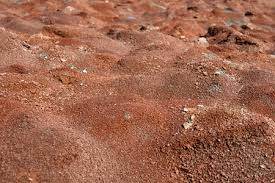

In [112]:
import PIL
PIL.Image.open(str(dataFrame['filename'][1]))

Found 1 validated image filenames belonging to 1 classes.


C:\Users\mahmo\AppData\Local\Temp\ipykernel_14356\1523263844.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


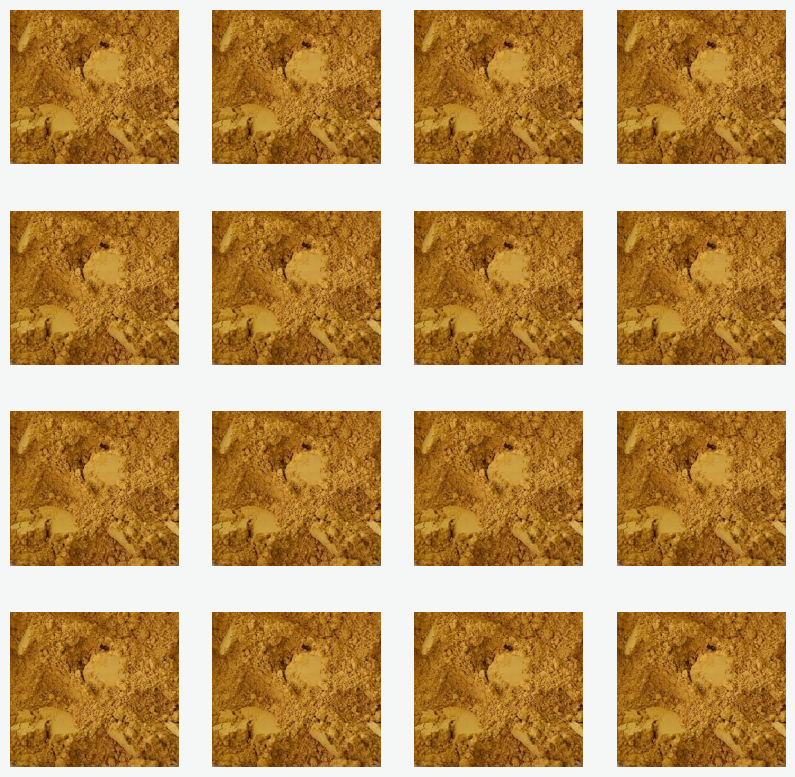

In [113]:
import matplotlib.pyplot as plt
def data_argumentation_show(n, grid_size):
    
    sample_data = train_datagen.flow_from_dataframe(
            (train_df.sample(n)),
            x_col = 'filename',
            y_col = 'category',
            target_size = (224, 244),
            class_mode = 'categorical')
  
  #subplot grid 
    fig = plt.figure(figsize = (10,10))
    fig.patch.set_facecolor('#f5f6f6')
    for i in range(0,grid_size*grid_size):
        plt.subplot(grid_size,grid_size, i+1)
        for x,y in sample_data:
            img = x[0]
            plt.imshow(img)
            plt.axis('off')
            break
            plt.tight_layout()
            del img
    fig.show()
data_argumentation_show(1,4)
